In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [ ]:
def create_dataset():
    ds = np.array([[1.0, 1.0], [0, 0], [1.1, 1.1], [1.1, 1.0]])
    labels = ['A', 'A', 'B', 'B']
    return ds, labels
ds, labels = create_dataset()


Для каждой точки в датасете:
1. вычислить расстояние до точки X
2. отсортировать получившиеся точки в убывающем порядке
3. взять k точек из тренировочного датасета с наименьшими расстояниями
4. выяснить, к каким классам принадлежат эти k точек
5. найти преобладающий класс среди этих точек
6. выдать его в качестве ответа

корень из суммы квадратов разностей соответствующих координат

csv = comma separated value (величины разделённые запятой)

1. Избавиться от пропусков: можно заменить всё нулями, можно заменить средним по столбцу, можно заменить самым частым в столбце, можно выбросить все строки в которых есть пропуски. Выбор метода заполнения напрямую зависит от свойств переменных и датасета.
2. Нужно отобрать бесполезные признаки от которых жанр точно не зависит

Сначала выкинем все строки с пропусками и посмотрим какой получится точность классификации, если 

In [9]:
df = pd.read_csv('/Users/glebsokolov/HeadRepo/DataSets/movie_metadata.csv')
df.shape[0]- df.dropna().shape[0]

1068

In [3]:
X, y = datasets.make_classification(n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    random_state=0)
X, y

(array([[-7.66054695e-01,  1.83324682e-01],
        [-9.20383253e-01, -7.23168038e-02],
        [-9.86585088e-01, -2.86920000e-01],
        [ 1.70910242e+00, -1.10453952e+00],
        [ 1.98764670e+00,  1.77624479e+00],
        [ 3.86274219e+00,  2.63325914e+00],
        [-1.12836011e+00, -4.22761581e-01],
        [-1.10074198e+00, -2.56042975e+00],
        [-1.53716448e+00,  1.10502647e+00],
        [-3.23726922e-01,  5.56269743e-01],
        [-1.28532883e+00, -1.30819171e+00],
        [ 3.35973253e+00, -1.79506345e+00],
        [-1.27034986e+00,  1.26780440e+00],
        [-7.10233633e-01, -1.13058206e+00],
        [-1.12933108e+00,  6.87661760e-01],
        [ 2.48206729e-01, -5.09792713e-01],
        [-2.47263494e+00, -4.86612462e-01],
        [-1.11573423e+00,  1.43370121e+00],
        [-1.21414740e+00,  1.97698901e+00],
        [-1.25860859e+00, -1.82896522e-01],
        [-5.35834091e-01,  1.10698637e+00],
        [ 9.23281451e-01, -1.30813451e+00],
        [ 2.02751248e+00, -4.032

Text(0.5, 1.0, 'Classification problem\n What is the color of the new (x1, y1) pair?')

Text(0.5, 0, 'feature 1')

Text(0, 0.5, 'feature 2')

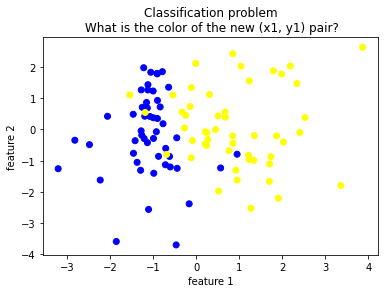

In [10]:
colors = ['yellow' if y_i else 'blue' for y_i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title('Classification problem\n What is the color of the new (x1, y1) pair?')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [28]:
point = [-0.5, -0.5]

In [8]:
X[0, 0], X[0, 1], colors[0]

(-0.766054694735782, 0.18332468205821462, 'blue')

In [13]:
X.shape

(100, 2)

In [17]:
X[0]
(((np.tile(X[0], (X.shape[0], 1)) - X)**2).sum(axis=1))**0.5

array([-0.76605469,  0.18332468])

array([0.        , 0.29861325, 0.51938783, 2.79016074, 3.18123653,
       5.23716903, 0.70612023, 2.76409189, 1.20172563, 0.57856882,
       1.57932479, 4.57560268, 1.19599744, 1.31509198, 0.62155098,
       1.22846976, 1.83336628, 1.29835174, 1.84878847, 0.61378116,
       0.9519204 , 2.25350996, 2.85448695, 3.48411918, 1.30301251,
       2.11300703, 1.42965678, 1.15501723, 0.487549  , 1.27155499,
       2.42674441, 0.79123366, 2.40745973, 2.82685306, 1.7569562 ,
       1.97678028, 1.46434119, 3.18490227, 1.46281201, 1.23154544,
       0.75468871, 3.07953431, 1.60020851, 0.51645095, 3.92361698,
       1.33131737, 3.38833263, 0.55254011, 2.07565379, 2.31855453,
       0.75757085, 0.59114453, 1.66323258, 0.38300975, 1.07335008,
       0.54234936, 0.71294125, 2.30076742, 1.60266913, 1.94754968,
       1.01511844, 2.63496346, 1.39471333, 2.58525739, 2.49418227,
       1.6169653 , 0.55636855, 1.05632845, 0.2119813 , 0.54897895,
       0.64451983, 2.22841107, 3.36347212, 1.05812811, 3.07179

In [23]:
import operator

In [32]:
def classify(data, inX, labels, k):
    data_size = data.shape[0]
    diff_matrix = np.tile(inX, (data_size, 1)) - data
    sq_diff_matrix = diff_matrix**2
    sq_distances = sq_diff_matrix.sum(axis=1)
    distances = sq_distances**0.5
    sorted_distances = distances.argsort()
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_distances[i]]
        class_count[vote_label] = class_count.get(vote_label, 0)+1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count
classify(X, point, y, 5)

[(0, 3), (1, 2)]

In [12]:
import uuid

name = 'VS-' + uuid.uuid4().hex.upper()[:4]
print(name)

VS-EF39
